In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ls -l ../data/

total 185784
-rw-r--r--  1 cabesd  staff    425922 Oct 26 23:29 master_Aug-5_agg.csv
-rw-r--r--@ 1 cabesd  staff  49110856 Sep 29 23:19 prelim master_Aug 5-Merged-with scores.csv
-rw-r--r--@ 1 cabesd  staff  18547652 Sep 28 16:34 prelim master_Aug 5-Merged.csv
-rw-r--r--@ 1 cabesd  staff  26289756 Aug  5 20:34 prelim master_Aug 5.csv
-rw-r--r--@ 1 cabesd  staff     11162 Sep  5 09:43 scores.csv


In [6]:
file = "../data/prelim master_Aug 5.csv"

In [15]:
df = pd.read_csv(file, index_col=0, parse_dates=['timestamp_from', 'timestamp_to'])

In [31]:
df.sample()

timestamp_from            timestamp_to  \
10979 2019-07-09 14:28:58.546 2019-07-09 14:29:04.546   

                                  device_id  accelerometer.accuracy  \
10979  4d6a0382-238d-4bd4-84ee-d88cc35a5f3d                     3.0   

       accelerometer.double_values_0  accelerometer.double_values_1  \
10979                      -0.012039                      -0.008163   

       accelerometer.double_values_2  accelerometer.values_considered  \
10979                      -0.983978                              1.0   

       battery.battery_adaptor  battery.battery_health  ...  sensor_wifi.ssid  \
10979                      NaN                     NaN  ...               NaN   

       sensor_wifi.values_considered  significant.is_moving  \
10979                            NaN                    NaN   

      significant.values_considered  wifi.bssid  wifi.frequency  wifi.rssi  \
10979                           NaN         NaN             NaN        NaN   

       wifi.security  wifi.ssid  wifi.values_considered  
10979            NaN        NaN                     NaN  

[1 rows x 141 columns]

In [46]:
df['device_id'].value_counts()

d8e061cb-282b-43f2-854e-9ae3c927f220    21073
51397770-d216-4391-ab33-243fb24bb81e    12375
4d6a0382-238d-4bd4-84ee-d88cc35a5f3d    10253
99a86843-82f2-43af-844a-978669900d19     7033
acc0b042-1b33-4857-bceb-7ddbdc9394ce     6465
5b2c4ac8-eea6-4f17-850f-0a7f10acee2f     4443
baf0ca22-ca12-4ebd-8378-20189109324f     4083
903be8ed-91d3-455a-a64b-1964e2d66e1b     3954
6489598a-b088-46f7-ae6e-d2dfb0c67ea5      762
fbd51491-a197-47c6-9c11-a3bf84705ff5      304
a6a7d8dc-c72c-4111-9935-a834a25fbaa6      116
91b15bd0-965d-44f7-aa2a-169214e1b28c      104
2d6133af-c77d-42e2-bacd-3d15e0f3a222       73
e4b4a4bf-3ca0-49df-8c29-1c655ba1d0fb       38
f4ca68e5-2413-445d-ba0c-9457f4a1b362       32
a65e4b1a-6f58-40d4-ac2f-bb2723954ab7       10
0ad5831b-e34a-42bc-b649-a8f8d60aa096        9
a8c008a0-0617-456a-b29e-a091555a889a        3
Name: device_id, dtype: int64

## Discard devices with less than 10000 records

In [47]:
interest_ids = df['device_id'].value_counts()[df['device_id'].value_counts() > 10000].index.tolist()

In [55]:
df = df.where(df['device_id'].isin(interest_ids)).drop_duplicates().drop(0)

# Accelerometer

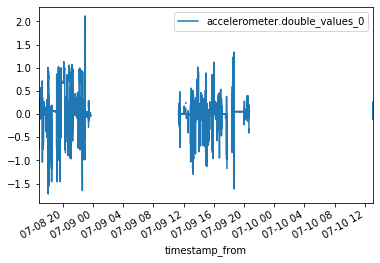

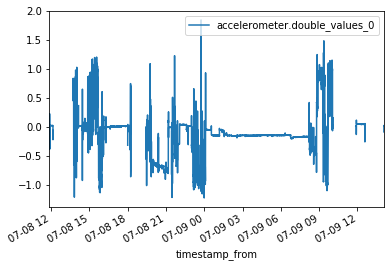

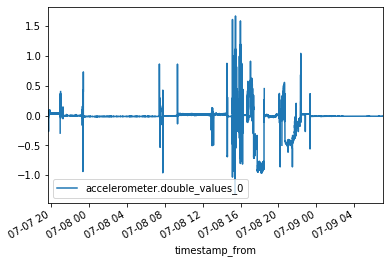

In [56]:
df.groupby(by='device_id').plot(x='timestamp_from', y='accelerometer.double_values_0');

In [60]:
df.groupby(by='device_id')['accelerometer.double_values_0'].rolling(window=12).mean()

device_id                                  
4d6a0382-238d-4bd4-84ee-d88cc35a5f3d  4747    NaN
                                      4748    NaN
                                      4749    NaN
                                      4750    NaN
                                      4751    NaN
                                               ..
d8e061cb-282b-43f2-854e-9ae3c927f220  62935   NaN
                                      62936   NaN
                                      62937   NaN
                                      62938   NaN
                                      62939   NaN
Name: accelerometer.double_values_0, Length: 43701, dtype: float64

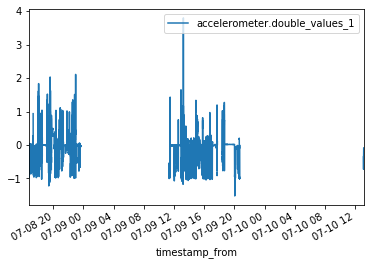

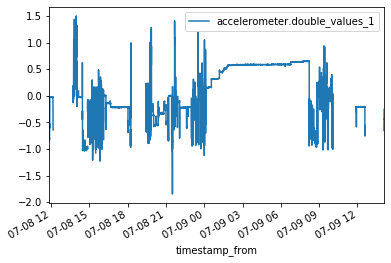

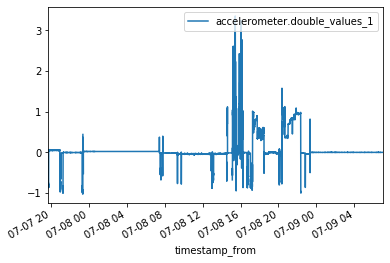

In [49]:
df.groupby(by='device_id').plot(x='timestamp_from', y='accelerometer.double_values_1');

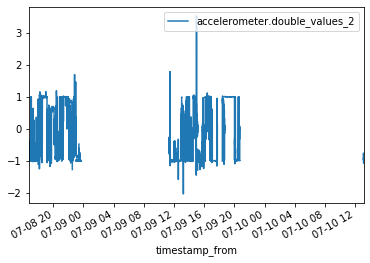

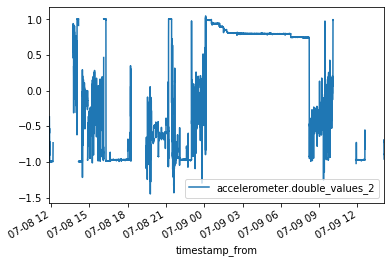

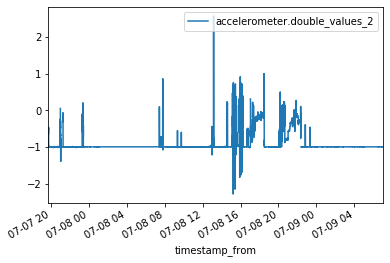

In [50]:
df.groupby(by='device_id').plot(x='timestamp_from', y='accelerometer.double_values_2');